In [1]:
import os
from os.path import join
import sys
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# load the combined cursorTracking data for all subjs
df = pd.read_table('../../data/groupData/allSubjsRaw.tsv', sep='\t')

In [5]:
# select the relevant rows from the full dataframe
df2 = df.loc[(df['stim'].str.contains("_images707/bw_hmn/")) | 
             (df['stim'].str.contains("_images707/hmn/"))]

## Compare all AOIs

In [6]:
# loop over all unique subjects
subjMeans = []
for s in np.unique(df2.subjID):
    # grab this subjects data
    subj_df = df2.loc[df2.subjID == s]
    
    # loop through unique trials
    trialAOImeans = []
    for i,t in enumerate(np.unique(subj_df.trialNum)):
        # grab this trial's data
        trial_df = subj_df[subj_df.trialNum == t]
        
        # calculate mean time/frame
        meanFrameInterval = trial_df.ts.diff().mean()
        
        # get number of frames for each AOI
        AOI_counts = trial_df.AOI.value_counts()
        
        # multiple frame counts by mean frame interval to get time spent in the AOI
        AOI_time = AOI_counts * meanFrameInterval
        
        # change the 'name' field of the AOI_time series to reflect the current trialNum
        AOI_time.name = t
    
        # add to table of all trials for this subject
        trialAOImeans.append(AOI_time)
    
    # put all of the trials together into one dataFrame
    allTrials = pd.concat(trialAOImeans, axis=1).T
    
    # calculate the mean across trials for each AOI for this subject
    subj_mean = allTrials.mean()
    
    # update the 'name' field to reflect current subject
    subj_mean.name = s
    
    # add this output to a list of all subjects
    subjMeans.append(subj_mean)
    
# put all subjects together into a single dataframe
allSubjs = pd.concat(subjMeans, axis=1).T

In [7]:
allSubjs.head()

,leftEye,mouth,none,nose,rightEye
741,538.404537,691.162707,3347.371514,390.517987,200.979809
1164,420.231712,632.202052,3292.316489,416.328025,222.376353
20649,414.957547,640.821790,2234.866997,1205.196830,485.819699
27235,698.093131,1027.404189,1614.358729,896.478646,1035.980601
27537,392.138764,408.874225,3684.264685,391.715437,113.746507


In [8]:
sns.set(style='whitegrid')

In [9]:
# drop the 'none' column
allSubjs = allSubjs.drop('none', 1)

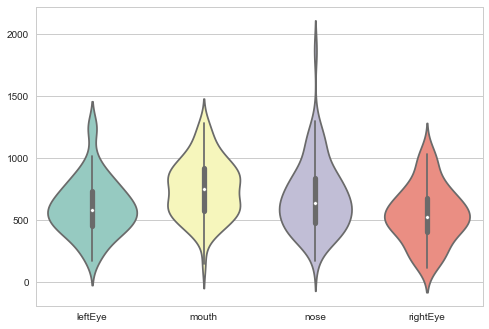

In [11]:
# plot distributions of each AOI
sns.violinplot(data=allSubjs, palette='Set3')